In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue

In [ ]:
def create_occupancy_grid(grid_size, num_obstacles, obstacle_radius):
    grid = np.zeros(grid_size)

    obstacle_centers = []
    for _ in range(num_obstacles):
        center = np.random.randint(0, grid_size[0]), np.random.randint(0, grid_size[1])
        obstacle_centers.append(center)
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                distance = np.linalg.norm(np.array([i, j]) - np.array(center))
                if distance <= obstacle_radius:
                    grid[i, j] = 1  # Mark cell as occupied

    return grid, obstacle_centers

In [ ]:

def get_random_point_not_in_obstacle(grid, obstacle_centers):
    while True:
        point = np.random.randint(0, grid.shape[0]), np.random.randint(0, grid.shape[1])
        if all(np.linalg.norm(np.array(point) - np.array(center)) > 2 for center in obstacle_centers) and grid[point] == 0:
            return point

In [ ]:
def astar_direct(grid, start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))

    came_from = {}
    cost_so_far = {start: 0}

    while not open_set.empty():
        current = open_set.get()[1]

        if current == goal:
            break

        for i in range(-1, 2):
            for j in range(-1, 2):
                neighbor = (current[0] + i, current[1] + j)
                if (
                    0 <= neighbor[0] < grid.shape[0]
                    and 0 <= neighbor[1] < grid.shape[1]
                    and grid[neighbor] == 0
                ):
                    new_cost = cost_so_far[current] + (1 if i == 0 or j == 0 else np.sqrt(2))
                    if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                        cost_so_far[neighbor] = new_cost
                        priority = new_cost + heuristic(neighbor, goal)
                        open_set.put((priority, neighbor))
                        came_from[neighbor] = current

    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()

    return path

In [ ]:
def astar_direct_path(grid, start, waypoints):
    path = []
    current_start = start

    for waypoint in waypoints:
        segment_path = astar_direct(grid, current_start, waypoint)
        path.extend(segment_path[:-1])  # Avoid duplicate points
        current_start = waypoint

    final_path = astar_direct(grid, current_start, waypoints[-1])
    path.extend(final_path)  # Include all points of the final path

    return path

In [ ]:
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

In [ ]:
def plot_occupancy_grid_with_path_and_waypoints(occupancy_grid, start, destination, path, waypoints):
    plt.imshow(occupancy_grid, cmap='gray', origin='lower')
    plt.scatter(start[1], start[0], color='green', marker='o', label='Start')
    plt.scatter(destination[1], destination[0], color='red', marker='o', label='Destination')
    plt.scatter([p[1] for p in waypoints], [p[0] for p in waypoints], color='blue', marker='*', label='Waypoints')
    for i in range(len(path) - 1):
      plt.arrow(path[i][1], path[i][0], path[i + 1][1] - path[i][1], path[i + 1][0] - path[i][0],
              head_width=0.2, head_length=0.2, fc='orange', ec='orange')
    plt.legend()
    plt.title('Occupancy Grid Map with Path and Waypoints (Diagonal Movement Allowed)')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

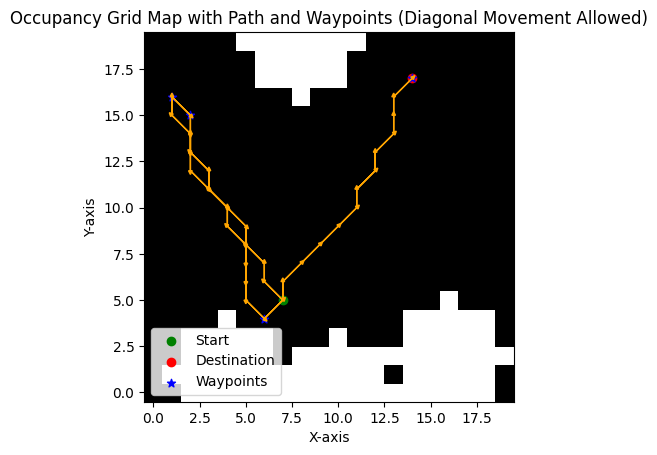

In [ ]:
grid_size = (20, 20)
num_obstacles = 5
obstacle_radius = 3

occupancy_grid, obstacle_centers = create_occupancy_grid(grid_size, num_obstacles, obstacle_radius)

start = get_random_point_not_in_obstacle(occupancy_grid, obstacle_centers)
destination = get_random_point_not_in_obstacle(occupancy_grid, obstacle_centers)

waypoints = [get_random_point_not_in_obstacle(occupancy_grid, obstacle_centers) for _ in range(3)]
waypoints.append(destination)
path_direct = astar_direct_path(occupancy_grid, start, waypoints)

plot_occupancy_grid_with_path_and_waypoints(occupancy_grid, start, destination, path_direct, waypoints)
